Supplementary analysis: Window length of 60 seconds
We here replicate the derivation of qualitatively similar three dynamic connectivity states
Please note: As the k-means clustering determines the order of States, it here differs: 
State 1 is State 1 of the main analysis, but State 2 is State 3 and State 3 is State 2).
As in the main analysis, we find significantly longer fraction and dwell times in a weakly connected state 
(State 2 of the main analysis, here State 3) in case of moderate symptoms and a longer fraction and
dwell times in the densely connected state (State 1 of the main analysis, here State 2) when comparing patients
with severe to moderate symptoms. Transition likelihoods do not differ significantly.

In [9]:
# initializing packages
import numpy as np
import pandas as pd
from scipy.io import loadmat
import glob
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
import pyreadstat

import scipy.stats as chi2_contingency
import scipy.stats as stats
from scipy.spatial import distance
from matplotlib import cm

# increasing display number of pandas columns and rows
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [10]:
# functions to transform vector to dfnc matrix
def calc_num_components(a):
    num_pairs = len(a)
    num_components = int(np.ceil(np.sqrt(2 * num_pairs - 1)))
    if num_components * (num_components - 1) == 2 * num_pairs:
        return num_components
    else:
        return 0


def return_dfnc_from_vector(a):
    '''This Function returns a dfnc matrix given a vector
        a : the vector of correlation pairs
    '''
    n = calc_num_components(a)
    out = np.zeros((n, n))

    if not n:
        return out
    
    l_indices = np.tril_indices(n, -1)
    u_indices = np.triu_indices(n, 1)

    out[u_indices] = a
    out[l_indices] = out.T[l_indices]
    
    return out

In [11]:
# variables used throughout the script
n_subjects = 48
n_controls = 17
n_controls_1 = 16 # as python starts indexing with zero
n_patients = 31

# Number of dFNC windows, number of correlations
n_windows = 152
n_corr = 78

In [12]:
# index of subgroups: worse == ARAT < 29; better == ARAT > 28 
worse= [34, 28, 19, 33, 42, 37, 25, 29, 27, 45, 46, 17, 31] 
better = [36, 38,35, 40, 41, 43,  39,  32, 18, 30, 26, 24, 23, 22, 21, 20, 44, 47] 

In [13]:
# correct indexing when having behavior of stroke patients only (excluding 17 controls)
worse_zero = np.subtract(worse,17)
better_zero = np.subtract(better,17)

# array indicating worse or better functional status
subgroups = np.ones(31)
subgroups[worse_zero] = 2

In [14]:
# load subject names
subject_names = glob.glob('/Users/anna/Documents/LV_Stroke_new/Data/DFNC_LV_1221_60_sec/WithSM_dfnc_sub*',)
subject_names = sorted(subject_names)

In [15]:
# load individual fncs
dfnc = np.zeros((n_subjects,n_windows,n_corr))
for n in range(0,n_subjects,1):
    
    dfnc[n] = loadmat(subject_names[n][-40:])['FNCdyn']

In [16]:
# load state information per window (before: saving clusterInfo.states as variable "a" in matlab ("WithSM_dfnc_post_process"))
x = loadmat('states_stroke.mat')["a"]
for n in range(0,np.shape(x)[0],1):
    if n==0:
        states = pd.DataFrame(x[n][0])
    else:
        states[n] = pd.DataFrame(x[n][0])
states = states.transpose()

In [17]:
# Creating state averages (MEDIAN) per subject
dfnc_1_med = pd.DataFrame(np.zeros((n_subjects, n_corr)))
dfnc_2_med = pd.DataFrame(np.zeros((n_subjects, n_corr)))
dfnc_3_med = pd.DataFrame(np.zeros((n_subjects, n_corr)))

for n in range(0,n_subjects,1):
        dfnc_1_med.loc[n] = np.array(pd.DataFrame(dfnc[n][states.loc[n]==1]).median(axis=0))
        dfnc_1_med = pd.DataFrame(dfnc_1_med)
        dfnc_2_med.loc[n] = np.array(pd.DataFrame(dfnc[n][states.loc[n]==2]).median(axis=0))
        dfnc_2_med = pd.DataFrame(dfnc_2_med)
        dfnc_3_med.loc[n] = np.array(pd.DataFrame(dfnc[n][states.loc[n]==3]).median(axis=0))
        dfnc_3_med = pd.DataFrame(dfnc_3_med)

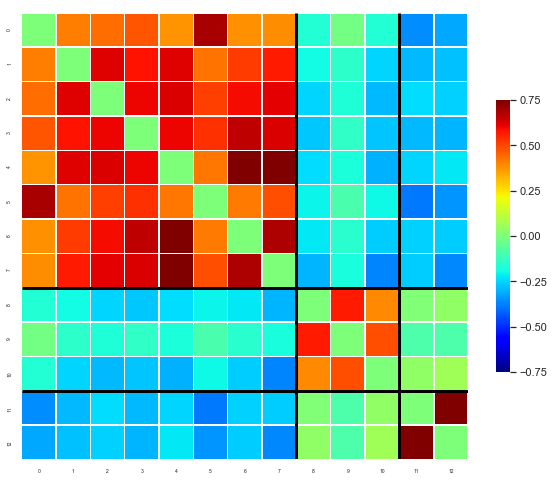

In [19]:
# State 1 
jet = cm.get_cmap('jet') 
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(pd.DataFrame(return_dfnc_from_vector(dfnc_1_med.dropna().median())), cmap=jet, vmax=0.75,vmin=-0.75, center=0,
            square=True,linewidths=.5, cbar_kws={"shrink": .5})
ax.tick_params(labelsize=5)
ax.hlines([8, 11], *ax.get_xlim(), colors='black', linewidth=3)
ax.vlines([8, 11], *ax.get_xlim(), colors='black', linewidth=3)
plt.show()

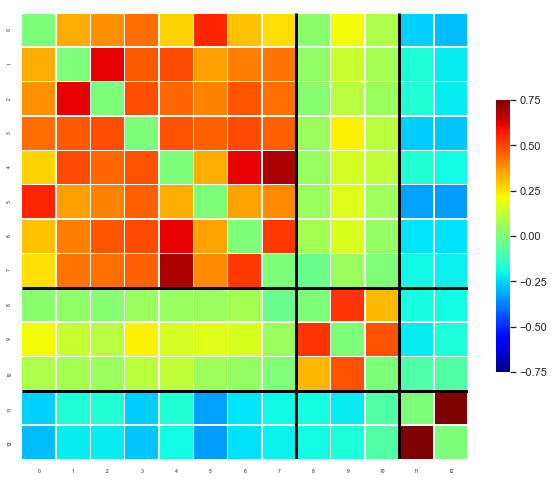

In [20]:
# State 2 (State 3 in the main analysis)
jet = cm.get_cmap('jet') 
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(pd.DataFrame(return_dfnc_from_vector(dfnc_2_med.dropna().median())), cmap=jet, vmax=0.75,vmin=-0.75, center=0,
            square=True,linewidths=.5, cbar_kws={"shrink": .5})
ax.tick_params(labelsize=5)
ax.hlines([8, 11], *ax.get_xlim(), colors='black', linewidth=3)
ax.vlines([8, 11], *ax.get_xlim(), colors='black', linewidth=3)
plt.show()

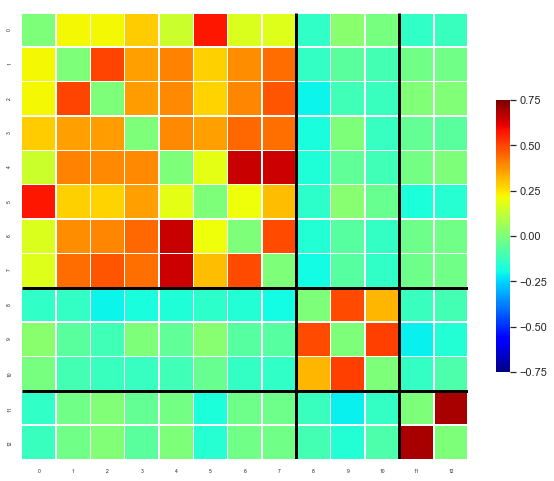

In [21]:
# State 3 (State 2 in the main analysis)
jet = cm.get_cmap('jet') 
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(pd.DataFrame(return_dfnc_from_vector(dfnc_3_med.dropna().median())), cmap=jet, vmax=0.75,vmin=-0.75, center=0,
            square=True,linewidths=.5, cbar_kws={"shrink": .5})
ax.tick_params(labelsize=5)
ax.hlines([8, 11], *ax.get_xlim(), colors='black', linewidth=3)
ax.vlines([8, 11], *ax.get_xlim(), colors='black', linewidth=3)
plt.show()

In [16]:
# load individual fraction times
fraction = loadmat('fraction_time.mat')["frac"]
fraction = pd.DataFrame(fraction)
fraction.columns = ["State_1", "State_2", "State_3"]

Subgroup analysis 

/Users/anna/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[]

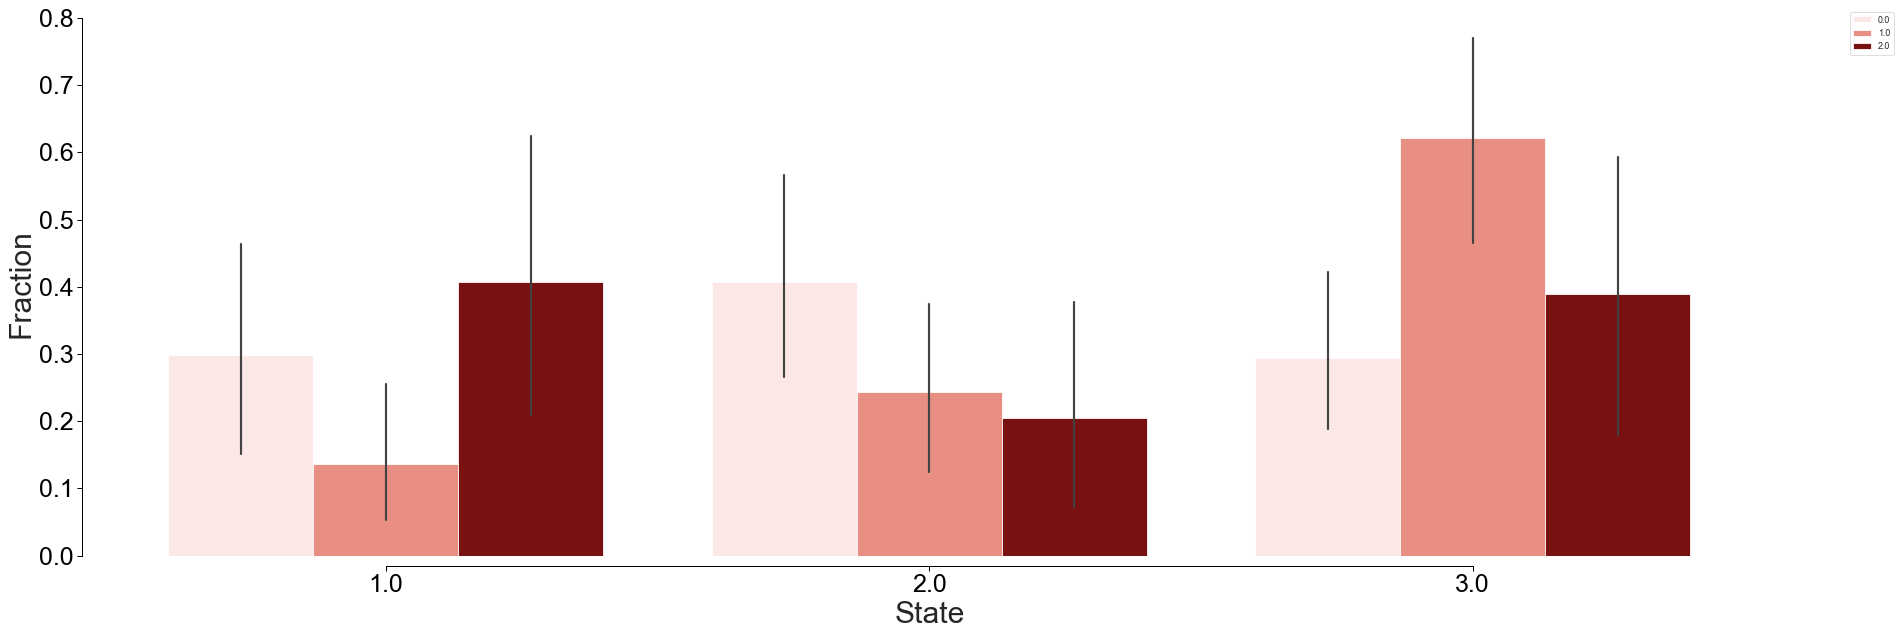

In [17]:
fraction_fig = pd.concat([fraction["State_1"], fraction["State_2"], fraction["State_3"]], axis=0)
fraction_fig = pd.DataFrame(fraction_fig)
fraction_fig.index = range(0,n_subjects*3)
fraction_fig = fraction_fig.rename(index=str, columns={0: "Fraction"})
fraction_fig["State"] = np.concatenate([np.ones(n_subjects), np.full(n_subjects,2),np.full(n_subjects,3)])
fraction_fig["Patient_status"] = np.concatenate([np.zeros(n_controls),subgroups,np.zeros(n_controls), subgroups, np.zeros(n_controls),subgroups])

plt.figure(figsize=(30, 10))
#sns.set(style="ticks", palette="pastel")   
sns.set_style('ticks', {'axes.edgecolor': '0',  
                        'xtick.color': '0',
                        'ytick.color': '0'})

sns.set_context("paper", rc={"font.size":30,"axes.titlesize":30,"axes.labelsize":30}) 

# Draw a nested boxplot to show bills by day and time
sns.barplot(x="State", y="Fraction",
            hue="Patient_status",palette=["mistyrose", "salmon", "darkred"],
            #hue="Patient_status",kind="bar",  palette=["silver", "salmon", "darkred"],
            data=fraction_fig)



sns.despine(offset=10, trim=True)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot()


In [18]:
# Three-level one-way ANOVA for fraction times: The ANOVA indicates a significant group effect for State 2 of the main analysis
a = stats.f_oneway(fraction["State_1"].loc[0:n_controls_1], fraction["State_1"].iloc[better],fraction["State_1"].iloc[worse],)[1]
b = stats.f_oneway(fraction["State_2"].loc[0:n_controls_1], fraction["State_2"].iloc[better],fraction["State_2"].iloc[worse],)[1]
c = stats.f_oneway(fraction["State_3"].loc[0:n_controls_1], fraction["State_3"].iloc[better],fraction["State_3"].iloc[worse],)[1]
print("State 1: %f" %stats.f_oneway(fraction["State_1"].loc[0:n_controls_1], fraction["State_1"].iloc[better],fraction["State_1"].iloc[worse],)[1])
print("State 2: %f" %stats.f_oneway(fraction["State_2"].loc[0:n_controls_1], fraction["State_2"].iloc[better],fraction["State_2"].iloc[worse],)[1])
print("State 3: %f" %stats.f_oneway(fraction["State_3"].loc[0:n_controls_1], fraction["State_3"].iloc[better],fraction["State_3"].iloc[worse],)[1])

State 1: 0.078694
State 2: 0.144415
State 3: 0.014430


In [19]:
# post-hoc t-test Control vs moderate: Patients with moderate symptoms spent significantly more time in State 2 of the main analysis
n_dfnc = ["State_1", "State_2", "State_3"]
no = [0,1,2,]
p_all_better = np.zeros(3)
print("Fraction time: Controls vs Patients with fewer symptoms")
for n, p in zip(n_dfnc, no):
    rvs1 = fraction[n].loc[0:n_controls_1]
    rvs2 = fraction[n].iloc[better]
    p_all_better[p] = stats.ttest_ind(rvs1,rvs2)[1] 
    print("%s" % n)
    print("Deficit: %f" %(rvs2.mean()))
    print("No Deficit: %f" %(rvs1.mean()))
    print("%f" %stats.ttest_ind(rvs1,rvs2)[1])

Fraction time: Controls vs Patients with fewer symptoms
State_1
Deficit: 0.135965
No Deficit: 0.298375
0.110741
State_2
Deficit: 0.243421
No Deficit: 0.407121
0.122611
State_3
Deficit: 0.620614
No Deficit: 0.294505
0.002833


In [20]:
# post-hoc t-test Control vs severe: No significant differences
p_all_worse = np.zeros(3)
print("Fraction time: Controls vs Patients with more symptoms")
for n, p in zip(n_dfnc, no):
    rvs1 = fraction[n].loc[0:n_controls_1]
    rvs2 = fraction[n].iloc[worse]
    p_all_worse[p] = stats.ttest_ind(rvs1,rvs2)[1] 
    print("%s" % n)
    print("Deficit: %f" %(rvs2.mean()))
    print("No Deficit: %f" %(rvs1.mean()))
    print("%f" %stats.ttest_ind(rvs1,rvs2)[1])

Fraction time: Controls vs Patients with more symptoms
State_1
Deficit: 0.407389
No Deficit: 0.298375
0.433977
State_2
Deficit: 0.203947
No Deficit: 0.407121
0.084182
State_3
Deficit: 0.388664
No Deficit: 0.294505
0.423530


In [21]:
# post-hoc t-test Moderate vs severe: Severely affected patients spent significantly more time in State 1, the densely connected State of the main analysis
p_all_bw = np.zeros(3)
print("Fraction time: Patients with moderate vs Patients with severe symptoms")
for n, p in zip(n_dfnc, no):
    rvs1 = fraction[n].iloc[better]
    rvs2 = fraction[n].iloc[worse]
    p_all_bw[p] = stats.ttest_ind(rvs1,rvs2)[1] 
    print("%s" % n)
    print("Severe Deficit: %f" %(rvs2.mean()))
    print("Moderate Deficit: %f" %(rvs1.mean()))
    print("%f" %stats.ttest_ind(rvs1,rvs2)[1])

Fraction time: Patients with moderate vs Patients with severe symptoms
State_1
Severe Deficit: 0.407389
Moderate Deficit: 0.135965
0.027863
State_2
Severe Deficit: 0.203947
Moderate Deficit: 0.243421
0.712937
State_3
Severe Deficit: 0.388664
Moderate Deficit: 0.620614
0.086672


In [22]:
# load dwell times
dwell = loadmat('dwell_time.mat')["dwell"]
dwell = pd.DataFrame(dwell)
dwell.columns = ["State_1", "State_2", "State_3"]

In [23]:
# Dwell times in general do not differ between the groups
rvs1 = np.array(dwell.loc[0:n_controls_1]).ravel()
rvs2 = np.array(dwell.iloc[better]).ravel()
rvs3 = np.array(dwell.iloc[worse]).ravel()
print("Mean dwell time")
print("No deficit: %f" %(rvs1.mean()))
print("Moderate Deficit: %f" %(rvs2.mean()))
print("Severe Deficit: %f" %(rvs3.mean()))
print("Mean dwell time diff: %f" %stats.f_oneway(rvs1, rvs2,rvs3,)[1])

Mean dwell time
No deficit: 24.352801
Moderate Deficit: 29.067901
Severe Deficit: 30.027778
Mean dwell time diff: 0.732628


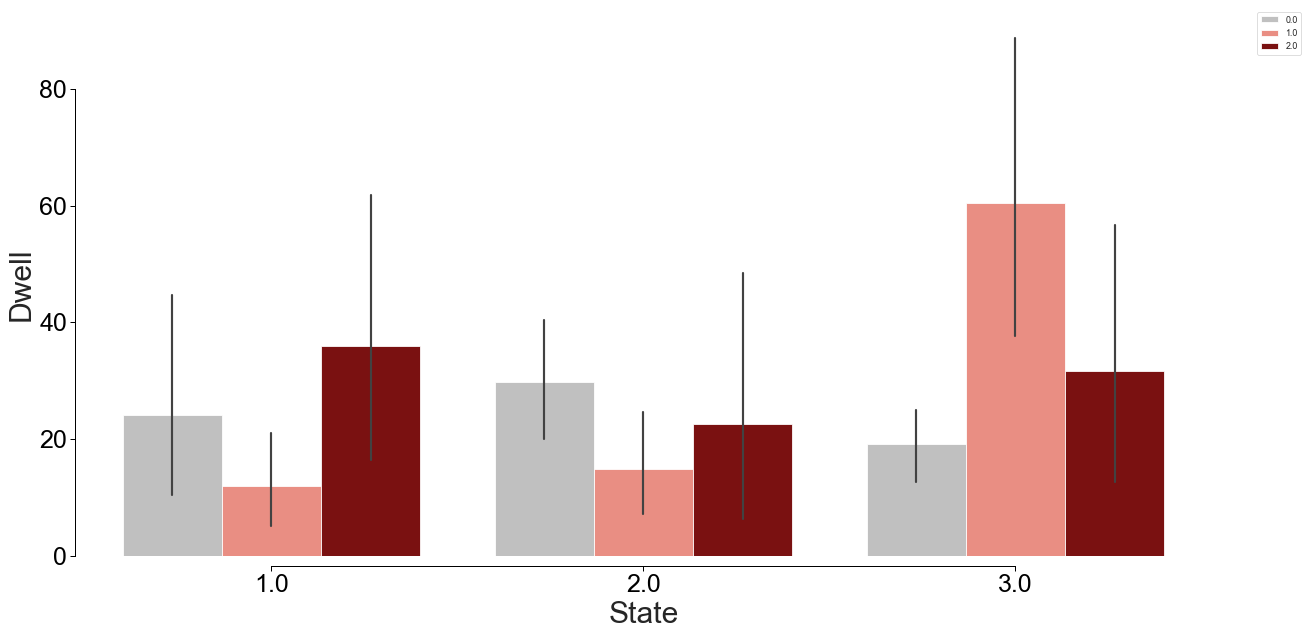

In [24]:
fraction_fig = pd.concat([dwell["State_1"], dwell["State_2"], dwell["State_3"]], axis=0)
fraction_fig = pd.DataFrame(fraction_fig)
fraction_fig.index = range(0,n_subjects*3)
fraction_fig = fraction_fig.rename(index=str, columns={0: "Dwell"})
fraction_fig["State"] = np.concatenate([np.ones(n_subjects), np.full(n_subjects,2),np.full(n_subjects,3)])
fraction_fig["Patient_status"] = np.concatenate([np.zeros(n_controls),subgroups,np.zeros(n_controls), subgroups, np.zeros(n_controls),subgroups])

plt.figure(figsize=(20, 10))
#sns.set(style="ticks", palette="pastel")   
sns.set_style('ticks', {'axes.edgecolor': '0',  
                        'xtick.color': '0',
                        'ytick.color': '0'})

sns.set_context("paper", rc={"font.size":30,"axes.titlesize":30,"axes.labelsize":30}) 

# Draw a nested boxplot to show bills by day and time
sns.barplot(x="State", y="Dwell",
            #hue="Patient_status",palette=["mistyrose", "salmon", "darkred"],
            hue="Patient_status",palette=["silver", "salmon", "darkred"],
            data=fraction_fig)
sns.despine(offset=10, trim=True)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



In [25]:
# Three-level one-way ANOVA for fraction times: The ANOVA shows a significant group effect for State 2 of the main analysis
d = stats.f_oneway(dwell["State_1"].loc[0:n_controls_1], dwell["State_1"].iloc[better],dwell["State_1"].iloc[worse],)[1]
e = stats.f_oneway(dwell["State_2"].loc[0:n_controls_1], dwell["State_2"].iloc[better],dwell["State_2"].iloc[worse],)[1]
f = stats.f_oneway(dwell["State_3"].loc[0:n_controls_1], dwell["State_3"].iloc[better],dwell["State_3"].iloc[worse],)[1]
print("State 1: %f" %stats.f_oneway(dwell["State_1"].loc[0:n_controls_1], dwell["State_1"].iloc[better],dwell["State_1"].iloc[worse],)[1])
print("State 2: %f" %stats.f_oneway(dwell["State_2"].loc[0:n_controls_1], dwell["State_2"].iloc[better],dwell["State_2"].iloc[worse],)[1])
print("State 3: %f" %stats.f_oneway(dwell["State_3"].loc[0:n_controls_1], dwell["State_3"].iloc[better],dwell["State_3"].iloc[worse],)[1])

State 1: 0.157965
State 2: 0.302439
State 3: 0.021397


In [26]:
# post-hoc t-test Control vs moderate: Moderately affected patients dwell significantly longer in State 2, and less in State 2 
p_all_better = np.zeros(3)
print("Dwell time: Controls vs Patients with fewer symptoms")
for n, p in zip(n_dfnc, no):
    rvs1 = dwell[n].loc[0:n_controls_1]
    rvs2 = dwell[n].iloc[better]
    p_all_better[p] = stats.ttest_ind(rvs1,rvs2)[1] 
    print("%s" % n)
    print("Deficit: %f" %(rvs2.mean()))
    print("No Deficit: %f" %(rvs1.mean()))
    print("%f" %stats.ttest_ind(rvs1,rvs2)[1])

Dwell time: Controls vs Patients with fewer symptoms
State_1
Deficit: 11.925926
No Deficit: 24.162745
0.223820
State_2
Deficit: 14.847222
No Deficit: 29.733894
0.046040
State_3
Deficit: 60.430556
No Deficit: 19.161765
0.007923


In [27]:
# post-hoc t-test Control vs severe: No significant differences
p_all_worse = np.zeros(3)
print("Dwell time: Controls vs Patients with more symptoms")
for n, p in zip(n_dfnc, no):
    rvs1 = dwell[n].loc[0:n_controls_1]
    rvs2 = dwell[n].iloc[worse]
    p_all_worse[p] = stats.ttest_ind(rvs1,rvs2)[1] 
    print("%s" % n)
    print("Deficit: %f" %(rvs2.mean()))
    print("No Deficit: %f" %(rvs1.mean()))
    print("%f" %stats.ttest_ind(rvs1,rvs2)[1])

Dwell time: Controls vs Patients with more symptoms
State_1
Deficit: 35.961538
No Deficit: 24.162745
0.435784
State_2
Deficit: 22.487179
No Deficit: 29.733894
0.546303
State_3
Deficit: 31.634615
No Deficit: 19.161765
0.268033


In [28]:
# post-hoc t-test moderate vs severe: Severely affected patients dwell significantly longer in State 1 of the main analysis, the densely connected state
p_all_bw = np.zeros(3)
print("Dwell time: Controls vs Patients with more symptoms")
for n, p in zip(n_dfnc, no):
    rvs1 = dwell[n].loc[better]
    rvs2 = dwell[n].iloc[worse]
    p_all_bw[p] = stats.ttest_ind(rvs1,rvs2)[1] 
    print("%s" % n)
    print("Deficit: %f" %(rvs2.mean()))
    print("No Deficit: %f" %(rvs1.mean()))
    print("%f" %stats.ttest_ind(rvs1,rvs2)[1])

Dwell time: Controls vs Patients with more symptoms
State_1
Deficit: 35.961538
No Deficit: 11.925926
0.046334
State_2
Deficit: 22.487179
No Deficit: 14.847222
0.497985
State_3
Deficit: 31.634615
No Deficit: 60.430556
0.145210


In [29]:
# No significant group effects for the number of transitions
num_trans = loadmat('num_trans.mat')["num_trans"]
num_trans = pd.DataFrame(num_trans)
rvs1 = num_trans.loc[0:n_controls_1]
rvs2 = num_trans.iloc[better]
rvs3 = num_trans.iloc[worse]
print("Mean No of transitions")
print("No deficit: %f" %(rvs1.mean()))
print("Moderate Deficit: %f" %(rvs2.mean()))
print("Severe Deficit: %f" %(rvs3.mean()))
print("Mean dwell time diff: %f" %stats.f_oneway(rvs1, rvs2,rvs3,)[1])

Mean No of transitions
No deficit: 4.588235
Moderate Deficit: 3.777778
Severe Deficit: 3.230769
Mean dwell time diff: 0.464448


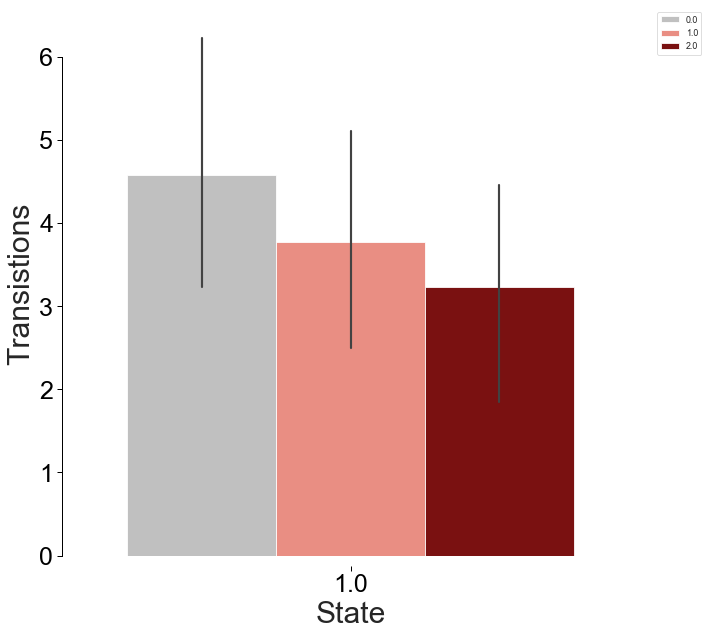

In [30]:
fraction_fig = pd.DataFrame(num_trans)
fraction_fig = fraction_fig.rename(index=str, columns={0: "Transistions"})
fraction_fig["State"] = np.concatenate([np.ones(n_subjects),])
fraction_fig["Patient_status"] = np.concatenate([np.zeros(n_controls),subgroups,])

plt.figure(figsize=(10, 10))
#sns.set(style="ticks", palette="pastel")   
sns.set_style('ticks', {'axes.edgecolor': '0',  
                        'xtick.color': '0',
                        'ytick.color': '0'})

sns.set_context("paper", rc={"font.size":30,"axes.titlesize":30,"axes.labelsize":30}) 

# Draw a nested boxplot to show bills by day and time
sns.barplot(x="State", y="Transistions",
            #hue="Patient_status",palette=["mistyrose", "salmon", "darkred"],
            hue="Patient_status",palette=["silver", "salmon", "darkred"],
            data=fraction_fig)
sns.despine(offset=10, trim=True)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



In [31]:
# load transition likelihood
transition = loadmat('transition.mat')["transition"]

In [36]:
# Three-level one-way ANOVA transition likelihoods (from state, to state)
trans_p = []
for no_1 in range(0,3,1):
    for no_2 in range(0,3,1):
        trans_c = []
        trans_pb = []
        trans_pw = []
        for n in range(0,n_controls,1):
                trans_c.append(pd.DataFrame(transition[n]).loc[no_1,no_2])
        for n in better:
                trans_pb.append(pd.DataFrame(transition[n]).loc[no_1,no_2])
        for n in worse:
                trans_pw.append(pd.DataFrame(transition[n]).loc[no_1,no_2])
        print(no_1)
        print(no_2)
        trans_p.append(stats.f_oneway(np.array(trans_c), np.array(trans_pb),np.array(trans_pw))[1])
        print("Transition: %f" %stats.f_oneway(np.array(trans_c), np.array(trans_pb),np.array(trans_pw))[1])
              
              

0
0
Transition: 0.116723
0
1
Transition: 0.519459
0
2
Transition: 0.180403
1
0
Transition: 0.847339
1
1
Transition: 0.340902
1
2
Transition: 0.384599
2
0
Transition: 0.430997
2
1
Transition: 0.097354
2
2
Transition: 0.297997


In [37]:
# post-hoc t-test controls vs moderate
for no_1 in range(0,3,1):
    for no_2 in range(0,3,1):
        trans_c_11 = []
        trans_p_11 = []
        print(no_1)
        print(no_2)
        for n in range(0,n_controls,1):
                trans_c_11.append(pd.DataFrame(transition[n]).loc[no_1,no_2])
        print("Mean controls: %f" %np.array(trans_c_11).mean())
        for n in better:
                trans_p_11.append(pd.DataFrame(transition[n]).loc[no_1,no_2])
        print("Mean better: %f" %np.array(trans_p_11).mean())
        print("Stats %f" %stats.ttest_ind(np.array(trans_c_11),np.array(trans_p_11))[1]) 

0
0
Mean controls: 0.964626
Mean better: 0.944868
Stats 0.337952
0
1
Mean controls: 0.013521
Mean better: 0.011597
Stats 0.855442
0
2
Mean controls: 0.021852
Mean better: 0.043535
Stats 0.251387
1
0
Mean controls: 0.021300
Mean better: 0.033006
Stats 0.694526
1
1
Mean controls: 0.962875
Mean better: 0.910443
Stats 0.188066
1
2
Mean controls: 0.015825
Mean better: 0.056551
Stats 0.175492
2
0
Mean controls: 0.068826
Mean better: 0.004283
Stats 0.262646
2
1
Mean controls: 0.037606
Mean better: 0.017808
Stats 0.202179
2
2
Mean controls: 0.893568
Mean better: 0.977909
Stats 0.142801


In [38]:
# post-hoc t-test controls vs severe
for no_1 in range(0,3,1):
    for no_2 in range(0,3,1):
        trans_c_11 = []
        trans_p_11 = []
        print(no_1)
        print(no_2)
        for n in range(0,n_controls,1):
                trans_c_11.append(pd.DataFrame(transition[n]).loc[no_1,no_2])
        print("Mean controls: %f" %np.array(trans_c_11).mean())
        for n in worse:
                trans_p_11.append(pd.DataFrame(transition[n]).loc[no_1,no_2])
        print("Mean worse: %f" %np.array(trans_p_11).mean())
        print("%f" %stats.ttest_ind(np.array(trans_c_11),np.array(trans_p_11))[1]) 

0
0
Mean controls: 0.964626
Mean worse: 0.985398
0.179966
0
1
Mean controls: 0.013521
Mean worse: 0.002653
0.229787
0
2
Mean controls: 0.021852
Mean worse: 0.011949
0.397714
1
0
Mean controls: 0.021300
Mean worse: 0.043055
0.534134
1
1
Mean controls: 0.962875
Mean worse: 0.893963
0.135337
1
2
Mean controls: 0.015825
Mean worse: 0.062982
0.176981
2
0
Mean controls: 0.068826
Mean worse: 0.064171
0.950891
2
1
Mean controls: 0.037606
Mean worse: 0.006949
0.079104
2
2
Mean controls: 0.893568
Mean worse: 0.928880
0.636612


In [39]:
# post-hoc t-test moderate vs severe
for no_1 in range(0,3,1):
    for no_2 in range(0,3,1):
        trans_c_11 = []
        trans_p_11 = []
        print(no_1)
        print(no_2)
        for n in better:
                trans_c_11.append(pd.DataFrame(transition[n]).loc[no_1,no_2])
        print("Mean better: %f" %np.array(trans_c_11).mean())
        for n in worse:
                trans_p_11.append(pd.DataFrame(transition[n]).loc[no_1,no_2])
        print("Mean worse: %f" %np.array(trans_p_11).mean())
        print("%f" %stats.ttest_ind(np.array(trans_c_11),np.array(trans_p_11))[1]) 

0
0
Mean better: 0.944868
Mean worse: 0.985398
0.046396
0
1
Mean better: 0.011597
Mean worse: 0.002653
0.318171
0
2
Mean better: 0.043535
Mean worse: 0.011949
0.116168
1
0
Mean better: 0.033006
Mean worse: 0.043055
0.828240
1
1
Mean better: 0.910443
Mean worse: 0.893963
0.788230
1
2
Mean better: 0.056551
Mean worse: 0.062982
0.891714
2
0
Mean better: 0.004283
Mean worse: 0.064171
0.076931
2
1
Mean better: 0.017808
Mean worse: 0.006949
0.128394
2
2
Mean better: 0.977909
Mean worse: 0.928880
0.144788
